In [1]:
# Dependencies
# from census import Census
# from config import (census_key, gkey, api_key)
from config import (poly_key, nomics_key)
import numpy as np
import pandas as pd
import requests
import json
import pprint
import time
from scipy.stats import linregress
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime as dt
import scipy.spatial as spatial
from matplotlib.ticker import Formatter
import dateutil.parser
from matplotlib import dates
import urllib.request


### Nomics

#### History Url

In [2]:
url_history_example = f"https://api.nomics.com/v1/market-cap/history?key={nomics_key}&start=2018-04-14T00%3A00%3A00Z&end=2018-05-14T00%3A00%3A00Z"
url_history_2021 = f"https://api.nomics.com/v1/market-cap/history?key={nomics_key}&start=2020-01-01T00%3A00%3A00Z&end=2020-02-01T00%3A00%3A00Z"


##### Pandemic Data History 

In [3]:
start_date = "2020-01-01"
end_date = "2021-10-31"
pandemic_url_history = f"https://api.nomics.com/v1/market-cap/history?key={nomics_key}&start={start_date}T00%3A00%3A00Z&end={end_date}T00%3A00%3A00Z"

# text file to hold the data
pandemic_all_data_file = open('pandemic_all_data_file.txt', 'w')
pandemic_timestamp_file = open('pandemic_timestamp_file.txt', 'w')
pandemic_market_cap_file = open('pandemic_market_cap_file.txt', 'w')
                    

In [6]:
response = requests.get(pandemic_url_history)
response_json = response.json()
market_closing_df = pd.read_json(json.dumps(response_json))
# pprint.pprint(response_json)

market_closing_df["timestamp"] = market_closing_df.loc[:, "timestamp"].astype(str)
dates = []
for i in range(len(market_closing_df)):
    old_string = market_closing_df.iloc[i,0]
    new_timestamp_string = old_string.replace('00:00:00+00:00', '').strip()
    newdate = dt.datetime.strptime(new_timestamp_string,'%Y-%m-%d').date()
    dates.append(newdate)


market_closing_df['date'] = dates
market_closing_df.head()


,timestamp,market_cap,date
0,2020-01-01 00:00:00+00:00,191923383110,2020-01-01
1,2020-01-02 00:00:00+00:00,186568492159,2020-01-02
2,2020-01-03 00:00:00+00:00,195608817962,2020-01-03
3,2020-01-04 00:00:00+00:00,196440238282,2020-01-04
4,2020-01-05 00:00:00+00:00,196976227668,2020-01-05


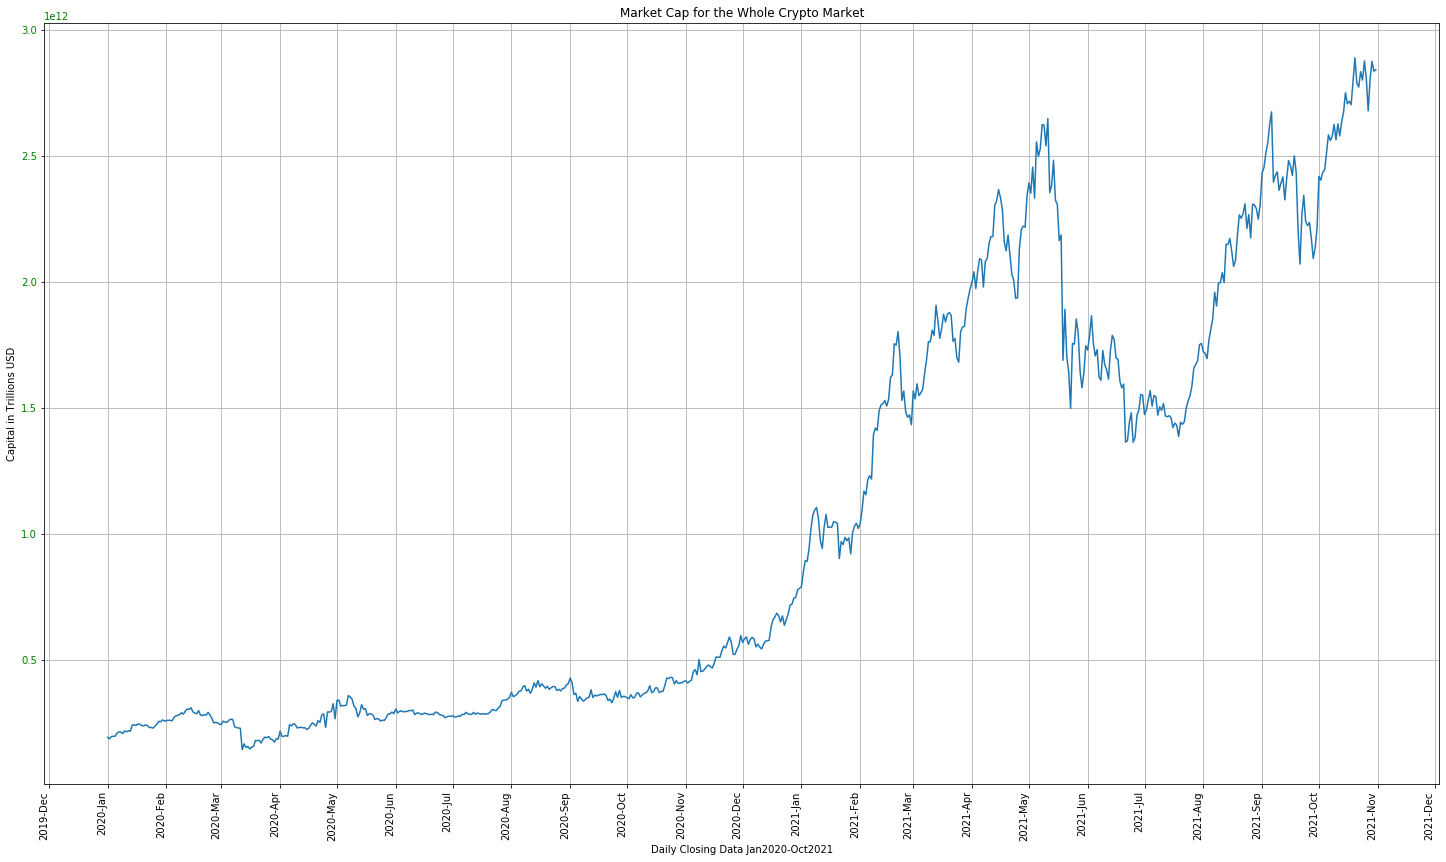

In [10]:
market_closing_df
date = market_closing_df["date"]
market_cap = market_closing_df["market_cap"]

fig = plt.figure()
ax = plt.axes()
# fig, ax = plt.subplots()
ax.plot(date, market_cap)

ax.set(xlabel='Daily Closing Data Jan2020-Oct2021',  ylabel='Capital in Trillions USD',
       title='Market Cap for the Whole Crypto Market')
ax.yaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=True, labelright=False)
fig.set_size_inches(25, 14, forward=True)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.grid(True)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=90, horizontalalignment='right')
plt.show()


In [ ]:
#Leo
url = f"https://api.nomics.com/v1/currencies/ticker?key={nomics_key}&interval=365d&convert=&per-page=100&page=1"

response = requests.get(url).json()

print(json.dumps(response, indent=4, sort_keys=True))

url = f"https://api.nomics.com/v1/currencies/ticker?key={nomics_key}&interval=365d&convert=EUR&per-page=100&page=1"

response = requests.get(url).json()

name = []
price = []
rank = []
cap = []
high = []
ticker = []
set_index = 0
for currency in response:
    name.append(response[set_index]["name"])
    ticker.append(response[set_index]['currency'])
    rank.append(response[set_index]['rank'])
    price.append(response[set_index]['price'])
    cap.append(response[set_index]['market_cap'])
    high.append(response[set_index]['high'])
    set_index += 1
        
currency_df = pd.DataFrame({
    "Name": name,
    "Price": price,
    "Rank": rank,
    "Market Cap": cap,
    "High": high,
    "Ticker": ticker,
})

ranked_currency_df = currency_df.head()
ranked_currency_df

In [ ]:
ranked_currency_df.dtypes

In [ ]:

colors = ["gold","paleturquoise","mediumorchid","lawngreen","orangered"]
explode = (0.2,0,0.1,0.1,0.1,)
wp = { 'linewidth' : .5, 'edgecolor' : "black" }
ranked_market_cap = ranked_currency_df["Market Cap"]
ranked_currency = currency_df["Name"]

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(ranked_market_cap, explode=explode, labels = ranked_currency_df["Name"], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90, wedgeprops= wp)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.legend(
        title = "Top 5 Biggest Crypto Currencies:",
        loc = "center",
        bbox_to_anchor =(1, 0, 0.5, 1))

plt.savefig("images/crypto_piechart.png")
plt.show()

#### Market Url

### Main Code

In [ ]:
url = f"https://api.nomics.com/v1/currencies/ticker?key={nomics_key}&interval=30d,365d&convert=&per-page=100&page=1"

response = requests.get(url).json()

print(json.dumps(response, indent=4, sort_keys=True))

In [ ]:
name = []
price = []
rank = []
cap = []
high = []
ticker = []
year_price_change = []
year_pct_price_change = []
year_mktcap_change = []
year_pct_mktcap_change = []
set_index = 0
for currency in response:
    try:
        name.append(response[set_index]["name"])
        ticker.append(response[set_index]['currency'])
        rank.append(response[set_index]['rank'])
        price.append(response[set_index]['price'])
        cap.append(response[set_index]['market_cap'])
        high.append(response[set_index]['high'])
    
        ypchange = response[set_index]['365d']['price_change']
        year_price_change.append(ypchange)
    
        yppchange = response[set_index]['365d']['price_change_pct']
        year_pct_price_change.append(yppchange)
    
        mpchange = response[set_index]['365d']["price_change"]
        year_mktcap_change.append(mpchange)
    
        mppchange = response[set_index]['365d']["price_change_pct"]
        year_pct_mktcap_change.append(mppchange)
    
        set_index += 1
        
    except(KeyError):
        year_mktcap_change.append("")
        year_pct_mktcap_change.append("")
        set_index += 1
    
top_currency_df = pd.DataFrame({
    "Name": name,
    "Ticker": ticker,
    "Rank": rank,
    "Price": price,
    "Market Cap": cap,
    "High": high,
    # "Year Price Change": year_price_change,
    "Year % Price Change": year_pct_price_change,
    "Year Market Cap Change": year_mktcap_change,
    "Year % Market Cap Change": year_pct_mktcap_change,
})         
top_currency_df.set_index('Name', inplace=True)
top_currency_df
currency_df['Price'] = currency_df['Price'].astype('float64')
currency_df['Rank'] = currency_df['Rank'].astype('int')
currency_df['Market Cap'] = currency_df['Market Cap'].astype('int')
currency_df['High'] = currency_df['High'].astype('float64')
# currency_df['Year Price Change'] = currency_df['Year Price Change'].astype('float64')
currency_df['Year % Price Change'] = currency_df['Year % Price Change'].astype('float64')
currency_df['Year Market Cap Change'] = currency_df['Year Market Cap Change'].astype('float64')
currency_df['Year % Market Cap Change'] = currency_df['Year % Market Cap Change'].astype('float64')
top_price = currency_df['Price'].nlargest(n=5)
top_mCap = currency_df['Market Cap'].nlargest(n=5)
top_p_change = currency_df['Year Price Change'].nlargest(n=5)
top_pp_change = currency_df['Year % Price Change'].nlargest(n=5)
top_mc_change = currency_df['Year Market Cap Change'].nlargest(n=5)
top_mcp_change = currency_df['Year % Market Cap Change'].nlargest(n=5)
top_pp_change

In [ ]:
#bubble chart